#Import Dataset

In [ ]:
import gdown
import zipfile
import os

# Buat direktori penyimpanan
os.makedirs("data/kucing", exist_ok=True)
os.makedirs("data/anjing", exist_ok=True)
os.makedirs("data/kelinci", exist_ok=True)

# Daftar file (ID Google Drive, lokasi output ZIP, dan folder ekstraksi)
files = [
    # Kucing
    ("1FVl0TB1Vp3CB8a7mE9qvz5omoUirlof6", "data/kucing/kucing.zip", "data/kucing"),

    # Anjing
    ("1v-DVzdHJ8D8XWjBOgOm7bEGxvT0ofwCM", "data/anjing/anjing.zip", "data/anjing"),

    # Kelinci
    ("1f-iL7l1LvV_4YNBXxWSjcnvoBkJSYEF6", "data/kelinci/kelinci1.zip", "data/kelinci"),
    ("118_WqkedYLw-w5snMeWkIaSp0Ghd4q3T", "data/kelinci/kelinci2.zip", "data/kelinci"),
    ("1CfpnTV2anJ-aZYi4L4Mv95IJWNYIYW_q", "data/kelinci/kelinci3.zip", "data/kelinci"),
]

# Fungsi unduh dan ekstrak
def download_and_extract(file_id, output_zip, extract_to):
    url = f"https://drive.google.com/uc?id={file_id}"
    print(f"Downloading: {output_zip}")
    gdown.download(url, output_zip, quiet=False)

    print(f"Extracting to: {extract_to}")
    with zipfile.ZipFile(output_zip, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

# Eksekusi semua file
for file_id, zip_path, extract_folder in files:
    download_and_extract(file_id, zip_path, extract_folder)


Downloading: data/kucing/kucing.zip


Downloading...
From (original): https://drive.google.com/uc?id=1FVl0TB1Vp3CB8a7mE9qvz5omoUirlof6
From (redirected): https://drive.google.com/uc?id=1FVl0TB1Vp3CB8a7mE9qvz5omoUirlof6&confirm=t&uuid=447f975d-55f8-483f-8e7c-883039a377d1
To: /content/data/kucing/kucing.zip
100%|██████████| 197M/197M [00:03<00:00, 54.3MB/s]


Extracting to: data/kucing
Downloading: data/anjing/anjing.zip


Downloading...
From (original): https://drive.google.com/uc?id=1v-DVzdHJ8D8XWjBOgOm7bEGxvT0ofwCM
From (redirected): https://drive.google.com/uc?id=1v-DVzdHJ8D8XWjBOgOm7bEGxvT0ofwCM&confirm=t&uuid=907ed96b-5e29-4cbe-8aa0-6beb33ef4afc
To: /content/data/anjing/anjing.zip
100%|██████████| 205M/205M [00:05<00:00, 37.5MB/s]


Extracting to: data/anjing
Downloading: data/kelinci/kelinci1.zip


Downloading...
From (original): https://drive.google.com/uc?id=1f-iL7l1LvV_4YNBXxWSjcnvoBkJSYEF6
From (redirected): https://drive.google.com/uc?id=1f-iL7l1LvV_4YNBXxWSjcnvoBkJSYEF6&confirm=t&uuid=fdf79205-aa48-42c4-89d1-e841322e32d1
To: /content/data/kelinci/kelinci1.zip
100%|██████████| 35.7M/35.7M [00:01<00:00, 34.5MB/s]


Extracting to: data/kelinci
Downloading: data/kelinci/kelinci2.zip


Downloading...
From (original): https://drive.google.com/uc?id=118_WqkedYLw-w5snMeWkIaSp0Ghd4q3T
From (redirected): https://drive.google.com/uc?id=118_WqkedYLw-w5snMeWkIaSp0Ghd4q3T&confirm=t&uuid=b6603359-afe8-4039-8b67-10ffe75177e0
To: /content/data/kelinci/kelinci2.zip
100%|██████████| 28.6M/28.6M [00:00<00:00, 53.9MB/s]


Extracting to: data/kelinci
Downloading: data/kelinci/kelinci3.zip


Downloading...
From (original): https://drive.google.com/uc?id=1CfpnTV2anJ-aZYi4L4Mv95IJWNYIYW_q
From (redirected): https://drive.google.com/uc?id=1CfpnTV2anJ-aZYi4L4Mv95IJWNYIYW_q&confirm=t&uuid=c2ff9104-65b3-478c-9994-9443285f74ce
To: /content/data/kelinci/kelinci3.zip
100%|██████████| 89.5M/89.5M [00:01<00:00, 50.4MB/s]


Extracting to: data/kelinci


In [ ]:
import os
import shutil
import hashlib

# Folder asal (hasil ekstraksi)
source_folder = "data/kelinci"
# Folder tujuan gabungan
target_folder = os.path.join(source_folder, "all")

# Buat folder tujuan jika belum ada
os.makedirs(target_folder, exist_ok=True)

def safe_filename(original_name, max_len=100):
    # Potong nama dasar file jika terlalu panjang dan tambahkan hash
    base, ext = os.path.splitext(original_name)
    base = base[:max_len]  # potong jika terlalu panjang
    hashed = hashlib.md5(original_name.encode()).hexdigest()[:6]
    return f"{base}_{hashed}{ext}"

# Fungsi untuk menyalin semua file gambar ke folder "all"
def copy_all_images_to_one_folder(source_base, target):
    for root, dirs, files in os.walk(source_base):
        for file in files:
            if file.lower().endswith((".jpg", ".jpeg", ".png", ".bmp", ".gif")):
                src_file_path = os.path.join(root, file)

                # Buat nama file aman
                new_file_name = safe_filename(file)
                dst_file_path = os.path.join(target, new_file_name)

                # Hindari duplikat
                counter = 1
                while os.path.exists(dst_file_path):
                    new_file_name = safe_filename(f"{file}_{counter}")
                    dst_file_path = os.path.join(target, new_file_name)
                    counter += 1

                shutil.copy2(src_file_path, dst_file_path)

# Eksekusi pemindahan file
copy_all_images_to_one_folder(source_folder, target_folder)

print("✅ Semua gambar kelinci berhasil digabung ke folder:", target_folder)


✅ Semua gambar kelinci berhasil digabung ke folder: data/kelinci/all


# Preprocessing

##EDA

In [ ]:
import os

# Path ke folder masing-masing kelas
folders = {
    "Kucing": "data/kucing/Image_Kucing",
    "Anjing": "data/anjing/Image_Anjing",
    "Kelinci": "data/kelinci/all"  # Folder gabungan kelinci
}

# Ekstensi gambar yang diperbolehkan
image_extensions = (".jpg", ".jpeg", ".png", ".bmp", ".gif")

# Hitung jumlah file gambar dalam setiap folder
for label, path in folders.items():
    count = 0
    for root, dirs, files in os.walk(path):
        for file in files:
            if file.lower().endswith(image_extensions):
                count += 1
    print(f"{label}: {count} gambar")


Kucing: 9056 gambar
Anjing: 9808 gambar
Kelinci: 5472 gambar


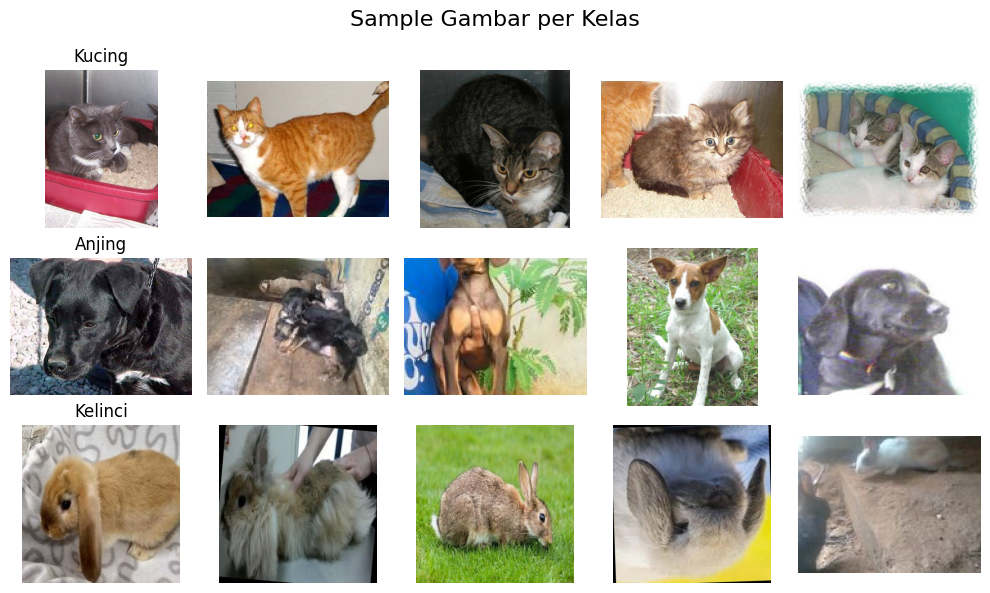

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Path baru ke folder masing-masing kelas
sample_paths = {
    "Kucing": "data/kucing/Image_Kucing",
    "Anjing": "data/anjing/Image_Anjing",
    "Kelinci": "data/kelinci/all"
}

# Fungsi untuk mengambil N path gambar dari folder (termasuk subfolder)
def get_image_paths(folder, max_images=5):
    image_files = []
    for root, _, files in os.walk(folder):
        for file in files:
            if file.lower().endswith((".jpg", ".jpeg", ".png", ".bmp", ".gif")):
                image_files.append(os.path.join(root, file))
                if len(image_files) >= max_images:
                    return image_files
    return image_files

# Fungsi menampilkan sample gambar dari tiap kelas
def show_sample_images(folder_dict, samples_per_class=5):
    fig, axs = plt.subplots(len(folder_dict), samples_per_class, figsize=(samples_per_class * 2, len(folder_dict) * 2))
    fig.suptitle("Sample Gambar per Kelas", fontsize=16)

    for row_idx, (label, path) in enumerate(folder_dict.items()):
        image_paths = get_image_paths(path, samples_per_class)

        for col_idx in range(samples_per_class):
            ax = axs[row_idx][col_idx] if len(folder_dict) > 1 else axs[col_idx]
            if col_idx < len(image_paths):
                try:
                    img = Image.open(image_paths[col_idx])
                    ax.imshow(img)
                    ax.axis('off')
                except Exception as e:
                    print(f"❌ Gagal membuka gambar {image_paths[col_idx]}: {e}")
            if col_idx == 0:
                ax.set_title(label)

    plt.tight_layout()
    plt.show()

# Tampilkan sample gambar
show_sample_images(sample_paths, samples_per_class=5)


In [ ]:
from PIL import Image
import os
from collections import Counter

# Path ke folder masing-masing kelas
paths = {
    "Kucing": "data/kucing/Image_Kucing",
    "Anjing": "data/anjing/Image_Anjing",
    "Kelinci": "data/kelinci/all"
}

# Ambil ukuran semua gambar
all_sizes = []

for label, path in paths.items():
    for root, _, files in os.walk(path):
        for file in files:
            if file.lower().endswith((".jpg", ".jpeg", ".png", ".bmp", ".gif")):
                try:
                    img_path = os.path.join(root, file)
                    img = Image.open(img_path)
                    all_sizes.append(img.size)  # (width, height)
                except Exception as e:
                    print(f"❌ Gagal membuka {img_path}: {e}")

# Hitung distribusi ukuran
size_counts = Counter(all_sizes)

print("📏 Distribusi ukuran gambar:")
for size, count in size_counts.items():
    print(f"  Ukuran {size}: {count} gambar")

# Cek konsistensi ukuran
if len(size_counts) == 1:
    print("\n✅ Semua gambar memiliki ukuran yang SAMA.")
else:
    print(f"\n⚠️ Terdapat {len(size_counts)} ukuran yang berbeda.")


📏 Distribusi ukuran gambar:
  Ukuran (357, 500): 4 gambar
  Ukuran (300, 224): 48 gambar
  Ukuran (473, 499): 10 gambar
  Ukuran (499, 375): 1858 gambar
  Ukuran (500, 379): 16 gambar
  Ukuran (374, 499): 10 gambar
  Ukuran (300, 299): 20 gambar
  Ukuran (349, 310): 2 gambar
  Ukuran (310, 500): 4 gambar
  Ukuran (500, 374): 1880 gambar
  Ukuran (477, 500): 6 gambar
  Ukuran (433, 500): 6 gambar
  Ukuran (360, 269): 24 gambar
  Ukuran (349, 360): 2 gambar
  Ukuran (488, 499): 8 gambar
  Ukuran (300, 278): 4 gambar
  Ukuran (445, 453): 2 gambar
  Ukuran (447, 336): 40 gambar
  Ukuran (396, 499): 6 gambar
  Ukuran (499, 417): 12 gambar
  Ukuran (499, 426): 10 gambar
  Ukuran (318, 480): 2 gambar
  Ukuran (320, 239): 148 gambar
  Ukuran (349, 366): 4 gambar
  Ukuran (344, 335): 4 gambar
  Ukuran (250, 500): 2 gambar
  Ukuran (374, 500): 154 gambar
  Ukuran (426, 500): 14 gambar
  Ukuran (458, 499): 4 gambar
  Ukuran (250, 249): 12 gambar
  Ukuran (324, 333): 2 gambar
  Ukuran (499, 384): 

## Balance Dataset

In [ ]:
from PIL import Image
import os

# Ukuran target
target_size = (224, 224)

# Folder output
output_base = "data_resized"

# Resize dan simpan ulang
for label, path in paths.items():
    output_path = os.path.join(output_base, label)
    os.makedirs(output_path, exist_ok=True)

    for root, _, files in os.walk(path):
        for file in files:
            if file.lower().endswith((".jpg", ".jpeg", ".png", ".bmp", ".gif")):
                try:
                    img_path = os.path.join(root, file)
                    img = Image.open(img_path).convert("RGB")
                    img = img.resize(target_size)

                    # Simpan dengan nama baru di folder output
                    img.save(os.path.join(output_path, file))
                except Exception as e:
                    print(f"❌ Gagal resize {img_path}: {e}")

print("✅ Semua gambar telah diresize ke 224x224 dan disimpan di folder 'data_resized'")


✅ Semua gambar telah diresize ke 224x224 dan disimpan di folder 'data_resized'


In [ ]:
import shutil
import random

# Path gambar setelah resize
resized_paths = {
    label: os.path.join("data_resized", label)
    for label in paths
}

# Hitung jumlah minimum dari semua kelas
class_counts = {
    label: len([
        f for f in os.listdir(path)
        if f.lower().endswith((".jpg", ".jpeg", ".png", ".bmp", ".gif"))
    ])
    for label, path in resized_paths.items()
}

min_count = min(class_counts.values())
print("📉 Jumlah gambar akan disamakan ke:", min_count, "per kelas.")

# Folder output seimbang
balanced_base = "data_balanced"
os.makedirs(balanced_base, exist_ok=True)

# Salin sample gambar secara acak
for label, path in resized_paths.items():
    output_path = os.path.join(balanced_base, label)
    os.makedirs(output_path, exist_ok=True)

    files = [
        f for f in os.listdir(path)
        if f.lower().endswith((".jpg", ".jpeg", ".png", ".bmp", ".gif"))
    ]
    selected = random.sample(files, min_count)

    for f in selected:
        src = os.path.join(path, f)
        dst = os.path.join(output_path, f)
        shutil.copy(src, dst)

print("✅ Dataset sudah diseimbangkan dan disimpan di folder 'data_balanced'")


📉 Jumlah gambar akan disamakan ke: 4256 per kelas.
✅ Dataset sudah diseimbangkan dan disimpan di folder 'data_balanced'


In [ ]:
import os

def count_images_in_folder(base_path):
    print(f"📦 Jumlah gambar per kelas di folder: {base_path}")
    for label in os.listdir(base_path):
        class_path = os.path.join(base_path, label)
        if os.path.isdir(class_path):
            count = len([
                f for f in os.listdir(class_path)
                if f.lower().endswith((".jpg", ".jpeg", ".png", ".bmp", ".gif"))
            ])
            print(f"  - {label}: {count} gambar")

# Contoh penggunaan:
count_images_in_folder("data_resized")   # Untuk folder hasil resize
count_images_in_folder("data_balanced")  # Untuk folder hasil balancing


📦 Jumlah gambar per kelas di folder: data_resized
  - Anjing: 5808 gambar
  - Kucing: 4256 gambar
  - Kelinci: 5472 gambar
📦 Jumlah gambar per kelas di folder: data_balanced
  - Anjing: 4256 gambar
  - Kucing: 4256 gambar
  - Kelinci: 4256 gambar


## Data Augmentation

In [ ]:
import os
import cv2
import numpy as np
import random
from skimage import img_as_ubyte

# Fungsi-fungsi augmentasi
def anticlockwise_rotation(image):
    rows, cols = image.shape[:2]
    M = cv2.getRotationMatrix2D((cols/2, rows/2), 30, 1)
    return cv2.warpAffine(image, M, (cols, rows))

def clockwise_rotation(image):
    rows, cols = image.shape[:2]
    M = cv2.getRotationMatrix2D((cols/2, rows/2), -30, 1)
    return cv2.warpAffine(image, M, (cols, rows))

def warp_shift(image):
    rows, cols = image.shape[:2]
    pts1 = np.float32([[50,50],[200,50],[50,200]])
    pts2 = np.float32([[10,100],[200,50],[100,250]])
    M = cv2.getAffineTransform(pts1, pts2)
    return cv2.warpAffine(image, M, (cols, rows))

def blur_image(image):
    return cv2.GaussianBlur(image, (5,5), 0)

def add_brightness(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hsv[...,2] = np.clip(hsv[...,2]*1.2, 0, 255)
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

def flip_up_down(image):
    return cv2.flip(image, 0)

def sheared(image):
    rows, cols = image.shape[:2]
    pts1 = np.float32([[50,50],[200,50],[50,200]])
    pts2 = np.float32([[50,50],[150,50],[50,150]])
    M = cv2.getAffineTransform(pts1, pts2)
    return cv2.warpAffine(image, M, (cols, rows))

# Dictionary transformasi
transformations = {
    'rotate_anticlockwise': anticlockwise_rotation,
    'rotate_clockwise': clockwise_rotation,
    'warp_shift': warp_shift,
    'blur_image': blur_image,
    'add_brightness': add_brightness,
    'flip_up_down': flip_up_down,
    'sheared': sheared
}

# Path
base_dir = "data_balanced"       # Dataset input
output_dir = "data_augmented"    # Folder hasil augmentasi
os.makedirs(output_dir, exist_ok=True)

# Konfigurasi jumlah augmentasi
images_to_generate = 5000

# Proses setiap kelas
for class_name in os.listdir(base_dir):
    class_path = os.path.join(base_dir, class_name)
    augmented_class_path = os.path.join(output_dir, class_name)
    os.makedirs(augmented_class_path, exist_ok=True)

    if os.path.isdir(class_path):
        image_paths = [
            os.path.join(class_path, f)
            for f in os.listdir(class_path)
            if f.lower().endswith((".jpg", ".jpeg", ".png", ".bmp", ".gif"))
        ]

        i = 1
        while i <= images_to_generate:
            image_path = random.choice(image_paths)
            try:
                image = cv2.imread(image_path)
                if image is None:
                    raise ValueError("Could not read image")

                transformed = image.copy()
                for _ in range(random.randint(1, 3)):  # Gunakan 1-3 transformasi acak
                    key = random.choice(list(transformations))
                    transformed = transformations[key](transformed)

                output_path = os.path.join(augmented_class_path, f"aug_{i}.jpg")
                transformed = img_as_ubyte(transformed)
                cv2.imwrite(output_path, transformed)
                i += 1

            except Exception as e:
                print(f"⚠️ Gagal memproses {image_path}: {e}")

print("✅ Proses augmentasi selesai! Hasil disimpan di folder 'data_augmented'")


✅ Proses augmentasi selesai! Hasil disimpan di folder 'data_augmented'


## MobilenetV2

Found 12000 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.
Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 81s 197ms/step - accuracy: 0.4377 - loss: 1.4672 - val_accuracy: 0.6200 - val_loss: 0.8421 - learning_rate: 1.0000e-04
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 68s 181ms/step - accuracy: 0.5434 - loss: 1.1442 - val_accuracy: 0.6733 - val_loss: 0.7291 - learning_rate: 1.0000e-04
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 68s 181ms/step - accuracy: 0.6097 - loss: 0.9671 - val_accuracy: 0.7053 - val_loss: 0.6718 - learning_rate: 1.0000e-04
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 70s 186ms/step - accuracy: 0.6418 - loss: 0.8833 - val_accuracy: 0.7027 - val_loss: 0.6667 - learning_rate: 1.0000e-04
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 68s 181ms/step - accuracy: 0.6606 - loss: 0.8285 - val_accuracy: 0.7297 - val_loss: 0.6368 - learning_rate: 1.0000e-04
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 70s 187ms/step - accuracy: 0.6674 - loss: 0.7918 - val_accuracy: 0.7213 - val_lo

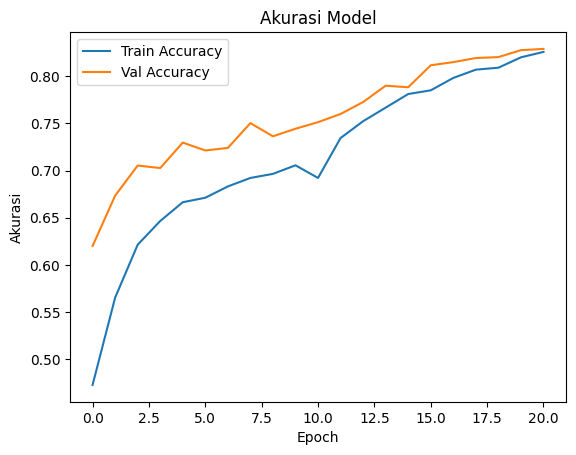

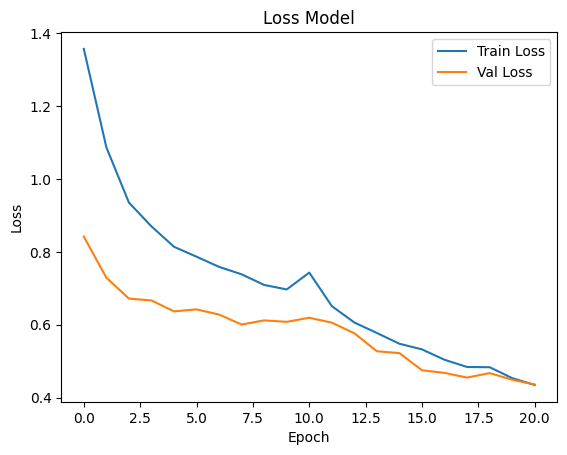

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# Set ukuran gambar dan batch
image_size = (128, 128)
batch_size = 32
train_dir = "data_augmented"

# Augmentasi data untuk pelatihan
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=30,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Data generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

num_classes = len(train_generator.class_indices)

# Load base model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False  # Freeze awal

# Tambahkan head custom
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
outputs = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=outputs)

# Kompilasi model awal
model.compile(optimizer=RMSprop(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callback
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ReduceLROnPlateau(factor=0.2, patience=3, verbose=1)
]

# Train awal
initial_epochs = 10
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=initial_epochs,
    callbacks=callbacks
)

# Fine-tuning: unfreeze sebagian MobileNetV2
base_model.trainable = True
for layer in base_model.layers[:100]:
    layer.trainable = False

# Kompilasi ulang setelah unfreeze
model.compile(optimizer=RMSprop(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Fine-tune
fine_tune_epochs = 10
total_epochs = initial_epochs + fine_tune_epochs

history_fine = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=total_epochs,
    initial_epoch=history.epoch[-1],
    callbacks=callbacks
)

# Plot Akurasi
plt.plot(history.history['accuracy'] + history_fine.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'] + history_fine.history['val_accuracy'], label='Val Accuracy')
plt.title('Akurasi Model')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()
plt.show()

# Plot Loss
plt.plot(history.history['loss'] + history_fine.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'] + history_fine.history['val_loss'], label='Val Loss')
plt.title('Loss Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
model.save("model_klasifikasi_hewan.keras")


In [ ]:
# Konversi model ke TFLite
keras_model_path = "model_klasifikasi_hewan.keras"
tflite_model_path = "model_klasifikasi_hewan.tflite"

# Load model Keras
model = tf.keras.models.load_model(keras_model_path)

# Buat converter
converter = tf.lite.TFLiteConverter.from_keras_model(model)
# (Opsional) Optimasi ukuran model
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Konversi
tflite_model = converter.convert()

# Simpan model TFLite
with open(tflite_model_path, "wb") as f:
    f.write(tflite_model)

print(f"Model TFLite berhasil disimpan di: {tflite_model_path}")


Saved artifact at '/tmp/tmp0pdr4s01'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  135939920606224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135939920604880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135939920605264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135939920605072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135939920606416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135939920606032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135939920601040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135939920601616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135939920600080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135939920606800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1359399206025

## Uji Model

Prediksi: Anjing (99.28%)


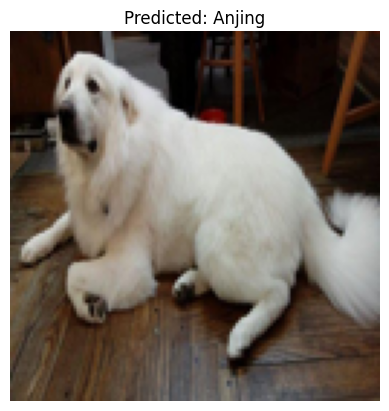

In [ ]:
# Load dan proses gambar RGB
from PIL import Image
import numpy as np

image_path = "/content/anjingtes.jpg"
image = Image.open(image_path).convert('RGB').resize((128, 128))

# Konversi ke array float32 dan normalisasi
input_data = np.array(image, dtype=np.float32) / 255.0

# Tambahkan batch dimension: (1, 128, 128, 3)
input_data = np.expand_dims(input_data, axis=0)

# Inferensi dengan TFLite
interpreter = tf.lite.Interpreter(model_path="model_klasifikasi_hewan.tflite")
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

interpreter.set_tensor(input_details[0]['index'], input_data)
interpreter.invoke()

output_data = interpreter.get_tensor(output_details[0]['index'])

# Prediksi
class_names = ['Anjing', 'Kelinci', 'Kucing']  # Sesuaikan jika class-nya beda
predicted_index = np.argmax(output_data)
predicted_label = class_names[predicted_index]
confidence = np.max(output_data)

print(f"Prediksi: {predicted_label} ({confidence*100:.2f}%)")

# Tampilkan gambar
import matplotlib.pyplot as plt
plt.imshow(image)
plt.title(f"Predicted: {predicted_label}")
plt.axis("off")
plt.show()
